Marçal Henrique Moreira  
Discente em Engenharia de Computação pelo IFMG - Campus Bambuí  
GitHub: [github.com/marcalhenrique](https://github.com/marcalhenrique)  
March 2023  
---

----------------

# Estudo de OCR com Pytesseract e OpenCV

In [46]:
# Importando Bibliotecas
import numpy as np
import cv2
import pytesseract
from PIL import Image
import re
import pandas as pd

# 1. Teste Inicial

A função ```cv2.imread()``` é usada para carregar uma imagem. O primeiro argumento é o caminho da imagem. O segundo argumento é um flag que especifica a maneira como a imagem deve ser lida.  
A imagem de teste está em escala de cinza, por isso não é necessário converter a imagem para RGB.  
Como a imagem de teste nao precisa de nenhum tratamento, podemos utilizar o pytesseract para extrair o texto da imagem com a função ```pytesseract.image_to_string(img)```.

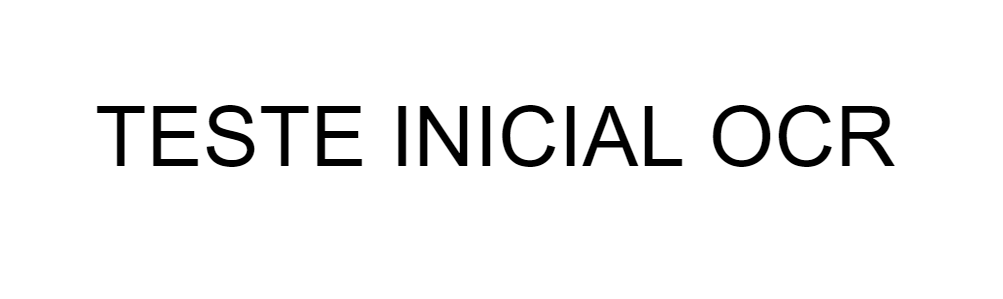

Texto da imagem:  TESTE INICIAL OCR



In [2]:
img_teste = cv2.imread('images_folder/teste.png') # Método que lê a imagem do diretório
img_teste = cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB) # Converte a imagem de BGR para RGB
display(Image.fromarray(img_teste)) # Exibe a imagem no notebook
# --------
text = pytesseract.image_to_string(img_teste) # Método que converte a imagem em texto
print("Texto da imagem: ", text)


# 2. Teste Inicial com Imagem em RGB

Em imagens coloridas o OpenCV carrega os canais de cores em ordem BGR (Blue, Green, Red). É necessário converter a imagem para RGB para utilizar o display() do IPython para mostrar a imagem original.
Para converter a imagem para RGB, usamos a função ```cv2.cvtColor()``` com o argumento ```cv2.COLOR_BGR2RGB```.

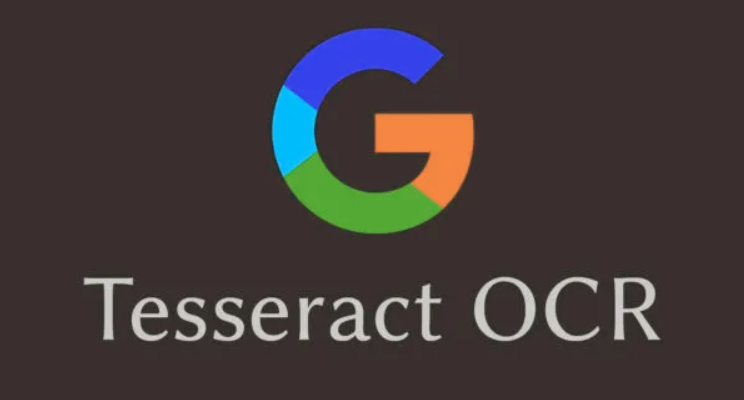

In [3]:
img_ocr_bgr = cv2.imread('images_folder/ocr.png')
display(Image.fromarray(img_ocr_bgr)) # Imagem em ordem BGR

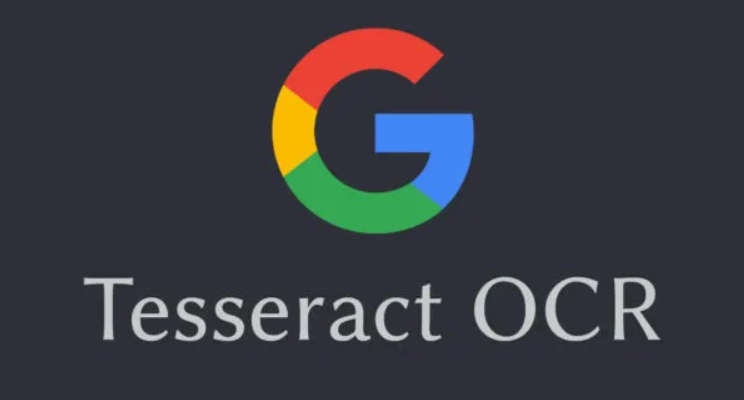

In [4]:
img_ocr_rgb = cv2.cvtColor(img_ocr_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_ocr_rgb)) # Imagem em ordem RGB

É possível utilizar o cv2.cvtColor() para converter a imagem para outras cores. Basta utilizar o argumento  ```cv2.COLOR_BGR2GRAY``` para converter a imagem para escala de cinza.    
Esses argumentos estão disponíveis na documentação do OpenCV.  
Link para a documentação: [OpenCV - Color Space Conversion](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

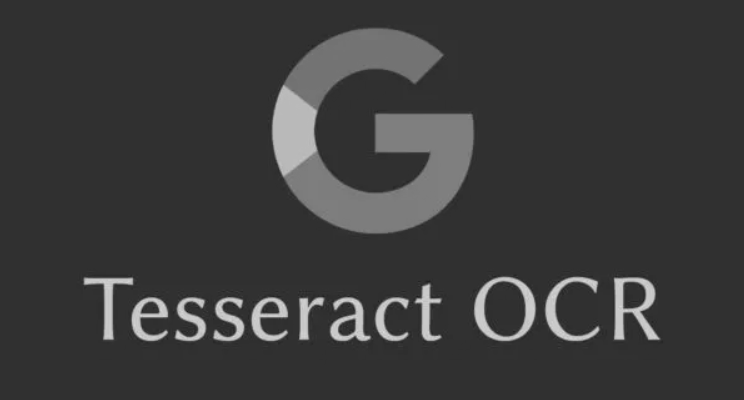

In [5]:
img_ocr_gray = cv2.cvtColor(img_ocr_rgb, cv2.COLOR_RGB2GRAY)
display(Image.fromarray(img_ocr_gray)) # Imagem em escala de cinza

Ao converter a imagem para cinza, é notável a perca de informações como as cores do simbolo da google ter ficado apenas com duas tonalidades de cinza.  
Geralmente isso é corrigido com tratamentos de imagem, como o uso de filtros.  
Com a imagem em escala de cinza e em RGB, podemos utilizar a função ```pytesseract.image_to_string(img)``` e ver como o pytesseract se comporta com cada uma das imagens.

In [6]:
text_rgb = pytesseract.image_to_string(img_ocr_rgb)
text_gray = pytesseract.image_to_string(img_ocr_gray)
print("Texto da imagem em RGB: ", text_rgb)
print("-------------------------")
print("Texto da imagem em cinza: ", text_gray)



Texto da imagem em RGB:  c

Tesseract OCR

-------------------------
Texto da imagem em cinza:  C

Tesseract OCR



É possível notar que o pytesseract se comporta diferente com cada uma das imagens.  
Existe um erro em ambas as imagens o "G" foi posto como "C", entretanto na imagem com escala de cinza o C foi posto em maiúsculo que se aproxima mais da letra G.

# 3. Utilizando Imagens com Texto

Até o momento, foi utilizado imagens textos simples. Utilizando uma imagem com um texto mais complexo, é possível estudar como o pytesseract se comporta com imagens com mais informações.

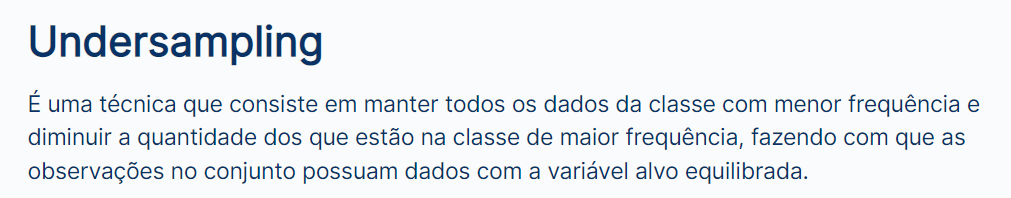

Texto da imagem em RGB: 

 Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



In [7]:
img_example_text = cv2.imread('images_folder/undersampling.png')
img_example_text = cv2.cvtColor(img_example_text, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_example_text))
# --------------------------------------
example_text_rgb = pytesseract.image_to_string(img_example_text)

print("Texto da imagem em RGB: \n\n", example_text_rgb)



As palavras com acentos tiveram erros de reconhecimento. Pois o pytesseract não foi especificado o idioma da imagem.  
Ao utilizar o comando ```tesseract --list-lang``` no terminal, é possível ver os idiomas disponíveis para o pytesseract. Nativamente o pytesseract não possui suporte para português. Para fazer o download do idioma português, é necessário utilizar o comando ```sudo apt install tesseract-ocr-por```.  
O argumento ```lang='por'``` é passado para a função ```pytesseract.image_to_string(img, lang='por')``` para especificar o idioma da imagem.

In [8]:
example_text_rgb = pytesseract.image_to_string(img_example_text, lang='por')
print("Texto da imagem com argumento de linguagem em português: \n\n", example_text_rgb)

Texto da imagem com argumento de linguagem em português: 

 Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



# 4. Utilizando o PSM (Page Segmentation Mode)
O PSM é uma das opções disponíveis na engine de reconhecimento óptico de caracteres do pytesseract. O PSM é usado para definir a maneira como o Tesseract irá segmentar a imagem para identificar as regiões de texto. Ele determina como a imagem será dividida em blocos e linhas, a fim de extrair o texto de cada região.  
O PSM do Pytesseract contém 14 modos de segmentação de página.  
Sendo eles:

In [9]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


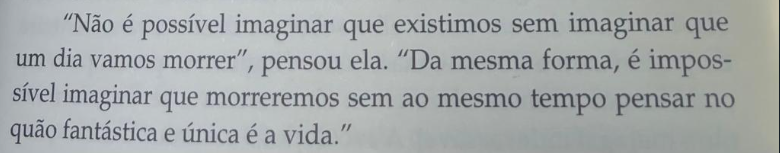

Texto da imagem: 

 “Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [10]:
img_trecho_livro = cv2.imread('images_folder/trecho_livro.png')
img_trecho_livro = cv2.cvtColor(img_trecho_livro, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_trecho_livro))
# --------------------------------------
texto_livro = pytesseract.image_to_string(img_trecho_livro, lang='por')
print("Texto da imagem: \n\n", texto_livro)

Nota-se que se não é utilizado o parametro do PSM, o pytesseract escolhe o modo que mas se aproxima do texto da imagem, neste caso o pytesseract escolheu o modo 6 "bloco de texto".  
Para analisar melhor como é o funcionamento do PSM, o próximo exemplo será forçado o psm 5 que trata o texto como um bloco alinhado vertical.

In [11]:
texto_livro = pytesseract.image_to_string(img_trecho_livro, lang='por', config='--psm 5')
print("Texto da imagem: \n\n", texto_livro)

Texto da imagem: 

 vo h e
586
Sean
mw
EE
Soo
bs É
o
& ES
SE
SE
Ea o
vi a
n
Eis
Eq É
iões
va É
So Ba
sê êsS
e
E o -
asd
Ação
=5ES
na
E 5a:
SE So
= Sme
to
os dom
Ss > as
Ss Es
E o
Eas
SS



Como mostrado neste exemplo, o PSM pode não reconhecer o padrão de texto da imagem e entregar uma saída incorreta. Portanto é muito importante entender o formato de texto da imagem para escolher o PSM correto.  
Abaixo exemplo de um PSM para nota fiscal.

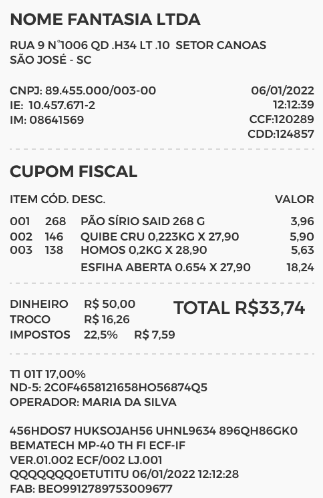

Texto da imagem: 

 NOME FANTASIA LTDA

RUA 9 N'1006 QD H34 LT 10 SETOR CANOAS
SÃO JOSÉ -sc

CNPJ: 89,455.000/003-00 06/01/2022
IE: 104576712 3239
IM: 08641569 ccraz0289
cDDazuBs7

CUPOM FISCAL
ITEM CÓD. DESC. VALOR
001 268 PÃO SÍRIO SAID 268 G 396
002 146 QUIBE CRU 0,223KG X 27,90 590
003 138  HOMOS 0,2KGX28,90 563
ESFIHA ABERTA 0.654X2790 1824

DINHEIRO R$5000 TOTAL R$33,74
TROCO R$16,26 "

IMPOSTOS 22,5% R$7,59

TONTI7,00%
ND-5: 2COF4658121658HOS68740S
OPERADOR: MARIA DA SILVA

4SSHDOS7 HUKSOJAHS6 UHNL9634 896QHBSGKO
BEMATECH MP-40 TH FI ECFIF

VER 01.002 ECF/002 13.001

QQQQQNROETUTITU 06/01/2022 121228

FAB: BEO9912789753009677



In [12]:
img_nota_fiscal = cv2.imread('images_folder/nota_fiscal.png')
img_nota_fiscal = cv2.cvtColor(img_nota_fiscal, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img_nota_fiscal))
# --------------------------------------
texto_nota_fiscal = pytesseract.image_to_string(img_nota_fiscal, lang='por', config='--psm 4')
print("Texto da imagem: \n\n", texto_nota_fiscal)

# 5. Obtendo Meta Dados
O Pytesseract possui uma função que retorna os metadados da imagem. essa função é chamada de OSD (Orientation and Script Detection). ```pytesseract.image_to_osd(img)```.  
A função retorna uma string com os metadados da imagem contendo informações como a orientação do texto, a direção do texto, o script do texto, a confiança em % do texto e a página do texto.

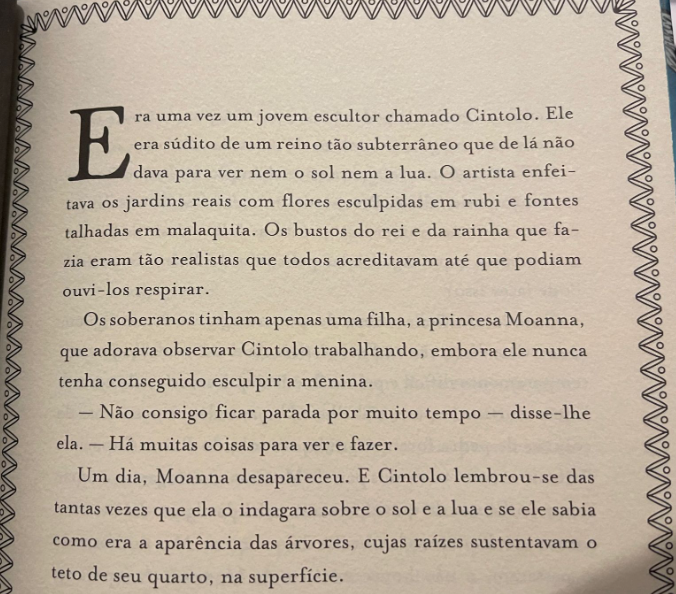

Meta dados da imagem: 

 Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



In [13]:
img_texto_livro = cv2.imread('images_folder/livro.png')
img_texto_livro = cv2.cvtColor(img_texto_livro, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_texto_livro))
# --------------------------------------
texto_livro = pytesseract.image_to_osd(img_texto_livro)
print("Meta dados da imagem: \n\n", texto_livro)

# 6. Obtendo Dados de Cada Região de Texto
O ```pytesseract.image_to_data(imagem)``` retorna uma lista de dicionários com os dados de cada região de texto da imagem. Utilizando o argumento ```output_type=Output.DICT``` é possível retornar os dados em um dicionário.  
Como o retorno da função é um dicionário, é possível criar um dataframe com os dados para facilitar a visualização dos dados.

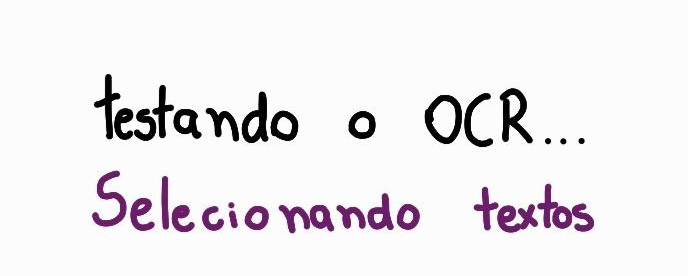

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,276,-1,
1,2,1,1,0,0,0,92,74,502,159,-1,
2,3,1,1,1,0,0,92,74,502,159,-1,
3,4,1,1,1,1,0,94,74,491,73,-1,
4,5,1,1,1,1,1,94,74,204,69,58,testando
5,5,1,1,1,1,2,348,111,28,28,95,o
6,5,1,1,1,1,3,425,88,160,59,70,OCR...
7,4,1,1,1,2,0,92,171,502,62,-1,
8,5,1,1,1,2,1,92,171,328,62,91,Selecionando
9,5,1,1,1,2,2,474,184,120,49,64,tests


In [43]:
img_teste_2 = cv2.imread('images_folder/teste2.png')
img_teste_2 = cv2.cvtColor(img_teste_2, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_teste_2))
# --------------------------------------
df_output = pd.DataFrame(pytesseract.image_to_data(img_teste_2, lang='por', output_type=pytesseract.Output.DICT))
df_output

## 6.1 Dicionário Retornado
O dicionarío retornado possui as seguintes chaves:

- **block_num**: Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região.
- **conf**: Confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto).
- **height**: Altura do bloco de texto detectada (ou seja, da caixa delimitadora).
- **left**: Posição x de onde inicia a caixa delimitadora.
- **level**: Nível correspondente à categoria do bloco detectado. São:
    1. Página
    2. Bloco
    3. Parágrafo
    4. Linha
    5. Palavra
Portanto, se retornado o valor 5, significa que o bloco detectado é uma palavra, se for 4, é uma linha, se for 3, é um parágrafo, se for 2, é um bloco e se for 1, é uma página.
- **line_num**: Número da linha do que foi detectado.
- **page_num**: Número da página do que foi detectado. Na maioria dos casos sempre haverá uma pagina.
- **text**: o resultado do reconhecimento.
- **top**: Coordenada y onde a caixa delimitadora começa.

## 6.2 Selecionando Regiões de Interesse
Com o dataframe criado, é possível selecionar as regiões de interesse.  
Com os valores que estão contido no dataframe é possível criar um retangulo na imagem original utilizando a função ```cv2.rectangle()```.  
O primeiro passo é criar uma cópia da imagem original para não alterar a imagem original.  
Em seguida é necessário criar uma função que irá receber os valores das colunas left, top, width e height e a partir desses valores criar um retangulo na imagem original.  
A função ```cv2.rectangle()``` recebe como argumento a imagem original, a posição inicial do retangulo (x, y), a posição final do retangulo (x + width, y + height), a cor do retangulo (B, G, R) e a espessura do retangulo.  
Depois de criada essa função é possível criar um loop para percorrer o dataframe e chamar a função para cada linha do dataframe.  
Também é possível escrever o texto reconhecido na imagem utilizando a função ```cv2.putText()```. Para utilizar essa função é necessário passar como argumento a imagem original, o texto a ser escrito, a posição do texto (x, y), a fonte do texto, o tamanho da fonte, a cor do texto e a espessura da fonte.


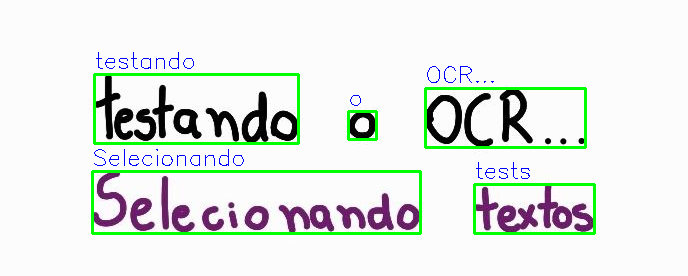

In [45]:
img_copy = img_teste_2.copy() # Cópia da imagem para não alterar a original

def caixa_texto(df_output, img_teste_2, i): # Função que cria a caixa de texto
    x = df_output['left'][i] # Coordenada x
    y = df_output['top'][i] # Coordenada y
    w = df_output['width'][i] # Largura
    h = df_output['height'][i] # Altura
    img = cv2.rectangle(img_teste_2, (x, y), (x+w, y+h), (0, 255, 0), 2) # Desenha a caixa de texto
    return x, y, img # Retorna as coordenadas e a imagem

for i in range(len(df_output['text'])): # Loop para percorrer o dataframe
    confianca = int(df_output['conf'][i]) # Confiança do texto
    if confianca > 57: # Se a confiança for maior que 57
        x, y, img = caixa_texto(df_output, img_copy, i) # Chama a função que cria a caixa de texto
        cv2.putText(img_copy, df_output['text'][i], (x, y-6), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1) # Escreve o texto na imagem

display(Image.fromarray(img_copy)) # Exibe a imagem com as caixas de texto

## 6.3 Obtendo Informações Específicas
Partindo do pressuposto que a imagem possui expressões regulares, é possível utilizar o dataframe para obter informações específicas com o uso da biblioteca ```re``` (Regular Expressions).  
Para o exemplo será utilizado uma imagem de tabela de despesas bancarias.

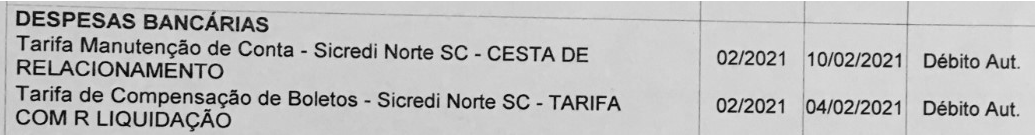

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1035,136,-1,
1,2,1,1,0,0,0,16,10,253,22,-1,
2,3,1,1,1,0,0,16,10,253,22,-1,
3,4,1,1,1,1,0,16,10,253,22,-1,
4,5,1,1,1,1,1,16,10,119,19,96,DESPESAS
5,5,1,1,1,1,2,144,11,125,21,96,BANCÁRIAS
6,2,1,2,0,0,0,16,35,1004,84,-1,
7,3,1,2,1,0,0,16,35,1004,82,-1,
8,4,1,2,1,1,0,16,35,1004,34,-1,
9,5,1,2,1,1,1,16,35,56,17,96,Tarifa


In [50]:
img_bancaria = cv2.imread('images_folder/tabela.png')
img_bancaria = cv2.cvtColor(img_bancaria, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img_bancaria))
# --------------------------------------
df_bancaria = pd.DataFrame(pytesseract.image_to_data(img_bancaria, lang='por', output_type=pytesseract.Output.DICT))
df_bancaria.head(10)

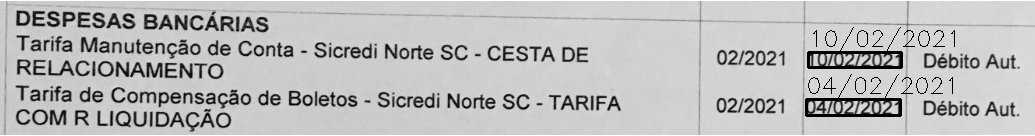

In [55]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$' # Expressão regular para data
img_copy = img_bancaria.copy() # Cópia da imagem para não alterar a original

for i in range(len(df_bancaria['text'])): # Loop para percorrer o dataframe
    confianca = int(df_bancaria['conf'][i]) # Confiança do texto
    if confianca > 57: # Se a confiança for maior que 57
        
        if re.match(padrao_data, df_bancaria['text'][i]): # Se o texto for uma data
            x, y, img = caixa_texto(df_bancaria, img_copy, i) # Chama a função que cria a caixa de texto
            cv2.putText(img_copy, df_bancaria['text'][i], (x, y-6), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)



display(Image.fromarray(img_copy)) # Exibe a imagem com as caixas de texto